In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import itertools

# Problem 1

In [2]:
# Реализую произвольную m,n, верхнетреугольную и симметричную. Остальное на вас - вам нужно дописать функцию.
# Не забудьте откомментировать ваши изменения в документации к функции!

import numpy as np

def matrix_generate(rows, columns, type_ = "full", eps = 0):
    """
    matrix_generate(rows, columns, type_ = "full")

    Создаёт случайную матрицу выбранного типа.

    Если матрицу нужных размеров создать нельзя должен выдать
    строку f"Error with type {type_} and shape ({rows},{columns})".

    Parameters
    ----------

    rows : int
        Количество строк в создаваемой матрице.
    columns : int
        Количество столбцов в создаваемой матрице.
    type_ : str, optional
        Тип создаваемой матрицы: "full", "upper_triangular", "symmetric" и т.д.
    eps: float, optional
        Дополнительное число, использующееся при генерации для некоторых типов матриц.

    Returns
    -------
    out : ndarray or str
        Выдаёт матрицу нужного типа либо ошибку.

    Notes
    -----
    Поддерживаемые типы матриц:
        "full","diagonal","upper_triangular","lower_triangulation",
        "symmetric","degenerate","step","perturbation"

    """

    A = None

    if type_ == "full":

        A = np.random.random(size=(rows, columns))

    elif type_ == "diagonal":

        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"

        else:
        
            A = np.random.random(size=(rows, columns)) * np.eye(rows)

    elif type_ == "upper_triangular":

        A = np.triu(np.random.random(size=(rows, columns)))

    elif type_ == "lower_triangular":

        A = np.tril(np.random.random(size=(rows, columns)))

    elif type_ == "symmetric":

        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"

        else:

            A = np.random.random(size=(rows, columns))
            A = np.triu(A) + np.triu(A, 1).T

    elif type_ == "degenerate":

        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"

        else:

            A = np.random.random(size=(rows, columns - 1))
            B = np.random.random(size=(rows - 1, columns))
            A = A @ B

    elif type_ == "step":

        if rows < columns:
            return f"Error with type {type_} and shape ({rows},{columns})"

        else:

            A = np.triu(np.random.random((rows, rows)), 1) + np.eye(rows)
            indices = list(range(rows))
            np.random.shuffle(indices)
            A = np.delete(A, indices[:rows - columns], axis=0)
            A = np.concatenate((A, np.zeros((rows - columns, rows))), axis=0)

    elif type_ == "perturbation":

        A = np.random.uniform(-eps, eps, size=(rows, columns))

    return A

In [3]:
matrix_generate(1, 3)

array([[0.38316602, 0.85318091, 0.95509461]])

In [4]:
matrix_generate(4, 4, type_ = "upper_triangular")

array([[0.57492368, 0.40820499, 0.36275787, 0.06862985],
       [0.        , 0.10978855, 0.00835925, 0.59716673],
       [0.        , 0.        , 0.77440529, 0.53168795],
       [0.        , 0.        , 0.        , 0.79326293]])

In [5]:
matrix_generate(4, 3, type_ = "upper_triangular")

array([[0.44671182, 0.47796201, 0.74774998],
       [0.        , 0.77128515, 0.7088401 ],
       [0.        , 0.        , 0.36811471],
       [0.        , 0.        , 0.        ]])

In [6]:
matrix_generate(4, 4, type_ = "lower_triangular")

array([[0.26071835, 0.        , 0.        , 0.        ],
       [0.37293008, 0.58095114, 0.        , 0.        ],
       [0.74799269, 0.54995829, 0.05066739, 0.        ],
       [0.85646617, 0.10941404, 0.84125758, 0.40946459]])

In [7]:
matrix_generate(4, 3, type_ = "lower_triangular")

array([[0.14051409, 0.        , 0.        ],
       [0.90889295, 0.88037862, 0.        ],
       [0.44650175, 0.4850668 , 0.05753722],
       [0.35614548, 0.71558594, 0.8122754 ]])

In [8]:
matrix_generate(4, 4, type_ = "symmetric")

array([[0.96378512, 0.3832133 , 0.73025422, 0.93605415],
       [0.3832133 , 0.20174415, 0.25542911, 0.67053741],
       [0.73025422, 0.25542911, 0.76822464, 0.8591812 ],
       [0.93605415, 0.67053741, 0.8591812 , 0.67280127]])

In [9]:
matrix_generate(4, 1, type_ = "symmetric")

'Error with type symmetric and shape (4,1)'

In [10]:
matrix_generate(4, 4, type_ = "diagonal")

array([[0.88466783, 0.        , 0.        , 0.        ],
       [0.        , 0.7115267 , 0.        , 0.        ],
       [0.        , 0.        , 0.85893593, 0.        ],
       [0.        , 0.        , 0.        , 0.65873445]])

In [11]:
matrix_generate(4, 1, type_ = "diagonal")

'Error with type diagonal and shape (4,1)'

In [12]:
A = matrix_generate(4, 4, type_ = "degenerate")

A, np.linalg.det(A)

(array([[0.86586749, 0.64246786, 0.88970379, 0.18876994],
        [1.25757575, 1.03619492, 1.00429659, 0.47140985],
        [0.71304572, 1.12903841, 0.5448858 , 0.77421344],
        [0.52202593, 0.98798971, 0.34833298, 0.73329814]]),
 -1.475992560860669e-17)

In [13]:
matrix_generate(4, 1, type_ = "degenerate")

'Error with type degenerate and shape (4,1)'

In [14]:
matrix_generate(4, 2, type_ = "step")

array([[1.        , 0.5882868 , 0.14965251, 0.60427523],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [15]:
matrix_generate(2, 4, type_ = "step")

'Error with type step and shape (2,4)'

In [16]:
matrix_generate(4, 3, type_ = "perturbation", eps = 0.01)

array([[ 0.002997  ,  0.00865019, -0.00161301],
       [ 0.00294654,  0.00250358, -0.00214057],
       [-0.00179197, -0.00705256,  0.00469054],
       [-0.00562264, -0.0056498 ,  0.00607488]])

По какой норме искать максимум?

Про вероятности: вырожденные матрицы составляют во множестве невырожденных меру нуль. Поэтому в случаях, когда матрица может быть невырожденной, она будет таковой с вероятностью 1. Или что значит посчитать численно?

(array([  2.,   0.,   1.,   1.,   0.,   1.,   0.,   5.,   6.,   4.,   4.,
         11.,  11.,  10.,  17.,  15.,  16.,  22.,  40.,  43.,  60.,  80.,
         74.,  95., 109.,  98., 139., 159., 164., 181., 216., 198., 257.,
        254., 255., 245., 315., 288., 313., 315., 295., 339., 324., 349.,
        311., 324., 297., 309., 309., 287., 262., 270., 214., 218., 206.,
        189., 169., 145., 149., 130., 109.,  77.,  78.,  84.,  90.,  63.,
         53.,  40.,  36.,  54.,  36.,  27.,  21.,  21.,  21.,  14.,  14.,
         10.,   2.,   6.,   7.,   2.,   3.,   3.,   1.,   1.,   1.,   1.,
          2.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.03262931, 0.03570697, 0.03878464, 0.0418623 , 0.04493996,
        0.04801763, 0.05109529, 0.05417296, 0.05725062, 0.06032828,
        0.06340595, 0.06648361, 0.06956128, 0.07263894, 0.0757166 ,
        0.07879427, 0.08187193, 0.0849496 , 0.08802726, 0.09110492,
        0.09418259, 0.09726025, 0.10033792, 0.

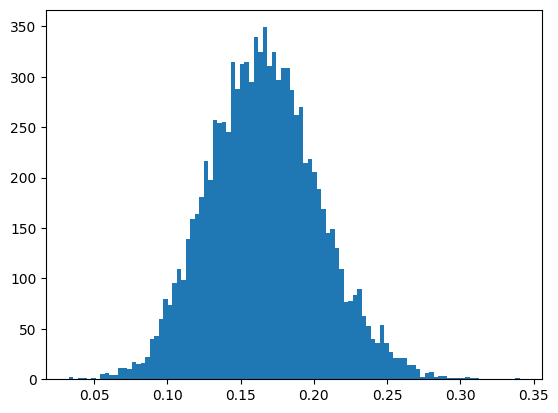

In [17]:
max_eigs = []

for i in range(10000):
    A = matrix_generate(10, 10, type_ = "perturbation", eps = 0.1)
    max_eigs.append(abs(max(scipy.linalg.eigvals(A))))

plt.hist(max_eigs, bins=100)

# Problem 2

In [18]:
def max_norm(x):
    ans = 0
    for i in x:
        ans = max(ans, abs(i))
    return ans

def L1_norm(x):
    ans = 0
    for i in x:
        ans += abs(i)
    return ans

def L2_norm(x):
    ans = 0
    for i in x:
        ans += i ** 2
    return ans ** 0.5

In [19]:
def mat_max_norm(A):
    ans = 0
    for i in A:
        ans_i = 0
        for j in i:
            ans_i += abs(j)
        ans = max(ans, ans_i)
    return ans

def mat_L1_norm(A):
    return mat_max_norm(A.T)

def mat_L2_norm(A):
    eigs = scipy.linalg.eigvals(A.T @ A)
    return max(eigs) ** 0.5

In [20]:
def cond_num(A, norm="L1"):
    if norm == "L1":
        A1 = np.linalg.matrix_power(A, -1)
        return mat_L1_norm(A1) * mat_L1_norm(A)

    elif norm == "L2":
        return (max(scipy.linalg.eigvals(A.T @ A)) / min(scipy.linalg.eigvals(A.T @ A))) ** 0.5

    elif norm == "max":
        return cond_num(A.T)

In [59]:
def func(A, f, norm="L1"):
    A1 = np.linalg.matrix_power(A, -1)
    if norm == "L1":
        return (mat_L1_norm(A1) * L1_norm(f) / L1_norm(A1 @ f)) ** (-1)

    elif norm == "L2":
        return mat_L2_norm(A1) * L2_norm(f) / L2_norm(A1 @ f)

    elif norm == "max":
        return mat_max_norm(A1) * max_norm(f) / max_norm(A1 @ f)

def normize(f, norm="L1"):
    if norm == "L1":
        return f / L1_norm(f)

    elif norm == "L2":
        return f / L2_norm(f)

    elif norm == "max":
        return f / max_norm(f)

def cond_num_approx(A, norm="L1"):
    eps = 0.000001
    h = 0.0001
    dist_prev = 1

    n = len(A)
    f = normize(np.random.random(size=(n, 1)), norm)
    
    while (dist_prev > eps):
        grad = []
        for i in range(n):
            f_p = f.copy()
            f_m = f.copy()

            f_p[i] += h
            f_m[i] -= h

            grad.append((func(A, f_p, norm) - func(A, f_m, norm)) / (2 * h))

        f_old = f.copy()
        f -= np.asarray(grad) * 0.0001
        f = normize(f)

        if norm == "L1":
            dist_prev = L1_norm(f - f_old)

        elif norm == "L2":
            dist_prev = L2_norm(f - f_old)

        elif norm == "max":
            dist_prev = max_norm(f - f_old)

        print(func(A, f))

    return func(A, f)

In [60]:
A = matrix_generate(5, 5, type_ = "full")

1 / cond_num_approx(A), cond_num(A)

[0.2871245]
[0.28697547]
[0.28682647]
[0.2866775]
[0.28652856]
[0.28637964]
[0.28623076]
[0.2860819]
[0.28593308]
[0.28578428]
[0.28563551]
[0.28548677]
[0.28533806]
[0.28518938]
[0.28504072]
[0.2848921]
[0.2847435]
[0.28459493]
[0.28444639]
[0.28429788]
[0.2841494]
[0.28400095]
[0.28385252]
[0.28370413]
[0.28355576]
[0.28340742]
[0.28325911]
[0.28311083]
[0.28296257]
[0.28281435]
[0.28266615]
[0.28251798]
[0.28236984]
[0.28222173]
[0.28207364]
[0.28192559]
[0.28177756]
[0.28162956]
[0.28148159]
[0.28133364]
[0.28118573]
[0.28103784]
[0.28088998]
[0.28074215]
[0.28059435]
[0.28044657]
[0.28029882]
[0.2801511]
[0.28000341]
[0.27985575]
[0.27970811]
[0.2795605]
[0.27941292]
[0.27926537]
[0.27911784]
[0.27897034]
[0.27882287]
[0.27867543]
[0.27852802]
[0.27838063]
[0.27823327]
[0.27808593]
[0.27793863]
[0.27779135]
[0.2776441]
[0.27749688]
[0.27734968]
[0.27720251]
[0.27705537]
[0.27690826]
[0.27676117]
[0.27661411]
[0.27646708]
[0.27632008]
[0.2761731]
[0.27602615]
[0.27587923]
[0.275732

(array([20.01084862]), 20.01914982321615)

# Problem 3

n - размерность пространства. $$ \frac{1}{\sqrt{n}} ||\mathbf{x}||_2 \leq ||\mathbf{x}||_1 \leq n ||\mathbf{x}||_2 $$

# Problem 4

1. $$ ||x||_2 = \sqrt{\sum\limits_{i = 1}^{m} x_i^2} \leq \sqrt{m \cdot (\max\limits_{i} x_i)^2} = \sqrt{m} \cdot \max\limits_{i} x_i = \sqrt{m} \cdot ||x||_{\infty} $$
Пример равенства: $ x = (1, 1, \dots, 1) \in \mathbb{R}^m $.

2. Здесь $ e = (1, 1, \dots, 1) \in \mathbb{R}^n $ $$ ||A||_{\infty} = \max\limits_{i} \sum\limits_{j} |a_{ij}| = ||Ae||_{\infty} \leq ||Ae||_2 \leq ||A||_2 ||e||_2 = \sqrt{n} \cdot ||A||_2 $$
Пример равенства: матрица, в которой $ a_{11} = 1 $, а все остальные элементы равны $ 0 $. 

# Problem 5

Без ограничения общности рассмотрим домножение на $U$ слева. Матрицу $A$ рассмотрим по столбцам. Квадрат нормы Фробениуса равен сумме квадратов длин векторов, которые задаются столбцами $A$. При домножении $A$ на $U$ длины этих векторов не меняются в силу унитарности $U$. Поэтому и квадраты длин не меняются, значит сохраняется и квадрат нормы Фробениуса.

# Problem 6*

In [ ]:
c = 5

In [ ]:
# Generate some data
np.random.seed(42)
lambda1 = np.random.normal(size=(c, c))
lambda2 = np.random.normal(size=(c, c))
lambda3 = np.random.normal(size=(c, c))
G1 = np.random.normal(size=(c, c, c))
G2 = np.random.normal(size=(c, c, c))
U = np.random.normal(size=(c, c, c, c))

In [ ]:
out = np.einsum_path("ab,cbd,de,feg,gh,ijcf->ahij", lambda1, G1, lambda2, G2, lambda3, U, optimize='optimal')

print(out[0], out[1])

In [ ]:
def Z_naive(lambda1, lambda2, lambda3, G1, G2, U):
    c = lambda1.shape[0]
    Z = np.zeros(shape=(c, c, c, c))
    for a, b, c, d, e, f, g, h, i, j in itertools.product(*([range(c)]*10)):
        Z[a, h, i, j] += lambda1[a, b]*lambda2[d, e]*lambda3[g, h]*G1[c, b, d]*G2[f, e, g]*U[i, j, c, f]
    return Z

In [ ]:
def Z_optimal(lambda1, lambda2, lambda3, G1, G2, U):
    c = lambda1.shape[0]

    lG1 = np.tensordot(G1, lambda1, axes = ([1], [1]))
    lG2 = np.tensordot(G2, lambda2, axes = ([1], [1]))
    lG3 = np.tensordot(lG2, lambda3, axes = ([2], [0]))
    GG = np.tensordot(lG3, lG1, axes = ([0], [2]))
    Z = np.tensordot(GG, U, axes = ([1, 2], [2, 3]))
    
    return Z

In [ ]:
%%timeit
Z = Z_naive(lambda1, lambda2, lambda3, G1, G2, U)

In [ ]:
%%timeit
Z = Z_optimal(lambda1, lambda2, lambda3, G1, G2, U)

In [ ]:
%%timeit
Z = np.einsum("ab,cbd,de,feg,gh,ijcf->ahij", lambda1, G1, lambda2, G2, lambda3, U, optimize='optimal')

Для Z_optimal требуется $ \chi^6 $ операций.